In [1]:
from matplotlib.lines import Line2D
from matplotlib import colors
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.structure.io.xtc as xtc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sse_to_num(sse):
    num = np.empty(sse.shape, dtype=int)
    num[sse == 'C'] = 0
    num[sse == 'E'] = 1
    num[sse == 'B'] = 2
    num[sse == 'S'] = 3
    num[sse == 'T'] = 4
    num[sse == 'H'] = 5
    num[sse == 'G'] = 6
    num[sse == 'I'] = 7
    return num

def dssp(file_path, index, text, save_path):
    f = open(file_path)
    line = f.readline()
    resi_num, M1_dssp = len(line) - 1, []
    while line:
        data = []
        for i in range(len(line) - 1):
            data.append(line[i])
        M1_dssp.append(data)
        line = f.readline()
    f.close()

    print(len(M1_dssp), len(M1_dssp[0]))
    # print(M1_dssp)
    M1_dssp = np.array(M1_dssp, dtype='U1')
    M1_dssp = sse_to_num(M1_dssp)


    # Plotting
    # SSE colormap
    color_assign = {
        r"coil": "white",
        r"$\beta$-sheet": "red",
        r"$\beta$-bridge": "black",
        r"bend": "green",
        r"turn": "yellow",
        r"$\alpha$-helix": "blue",
        r"$3_{10}$-helix": "gray",
        r"$\pi$-helix": "purple",
    }
    cmap = colors.ListedColormap(color_assign.values())


    plt.figure(figsize=(10.0, 6.5))

    plt.imshow(M1_dssp.T, cmap=cmap, origin='lower', aspect='auto')

    plt.xlabel("Time (ns)", family='Times New Roman', weight='bold', fontsize=22)
    plt.ylabel("Residue", family='Times New Roman', weight='bold', fontsize=22)
    plt.xlim(0, 101)
    plt.ylim(0, len(M1_dssp[0]))
    plt.xticks(range(0, 10100, 1000), range(0, 101, 10), fontsize=15, fontweight="bold")
    plt.yticks(index, text, fontsize=15, fontweight="bold")


    # Custom legend below the DSSP plot
    custom_lines = [
        Line2D([0], [0], color=cmap(i), lw=12) for i in range(len(color_assign))
    ]
    plt.legend(
        custom_lines, color_assign.keys(), loc="upper center",
        bbox_to_anchor=(0.5, -0.15), ncol=len(color_assign), fontsize=10
    )

    plt.tight_layout()
    plt.savefig(save_path, format='png', dpi=600)
    plt.show()

[17.0, 31.5, 41.0, 67.5, 78.5, 108.0, 125.0, 155.5, 169.0, 186.5, 202.0, 221.5, 237.0, 256.5, 273.0, 311.5]
10001 318


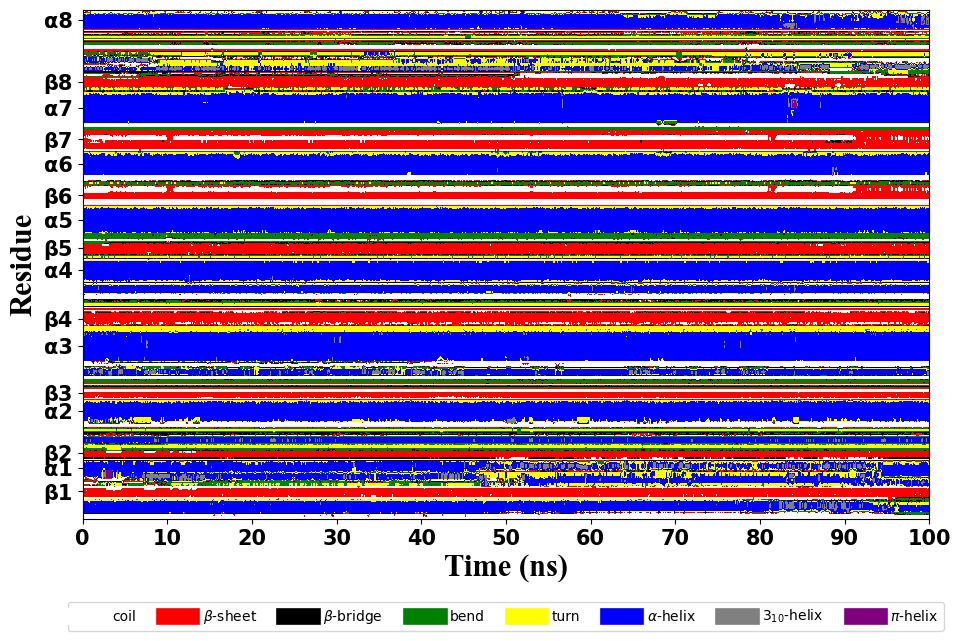

In [4]:
file_path = "C:/Users/17351/Downloads/md/M1/400K/dssp.dat"
save_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/dssp/M1/3/400k.png"
# dssp index，二级结构随时间变化图，标记2级结构位置
M1_index = [[14, 20], [26, 37], [39, 43], [61, 74], [76, 81], [99, 117], [121, 129],
                [149, 162], [166, 172], [179, 194], [200, 204], [215, 228], [231, 243],
                [247, 266], [270, 276], [306, 317]]
text = ["β1", "α1", "β2", "α2", "β3", "α3", "β4", "α4", "β5", "α5", "β6", "α6", "β7", "α7", "β8", "α8"]

TY1_index = [[12, 18], [28, 40], [42, 46], [59, 71], [75, 83], [100, 118], [122, 130], [144, 157], [161, 167],
                 [177, 193], [199, 203], [213, 225], [229, 238], [241, 258], [261, 267], [290, 301]]
index = []
for data in M1_index:
    index .append((data[0] + data[1]) / 2)
print(index)
dssp(file_path, index, text, save_path)